<a href="https://colab.research.google.com/github/jamesku1996/CS-6501-004-Computer-Networks/blob/master/HW1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCP Throughput v.s. Parallel Connections


## Script
```shell
#!/bin/sh
TIME=10
iperf3 -c bouygues.testdebit.info -p 5204 -t $TIME > p1.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 5 -t $TIME > p5.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 10 -t $TIME > p10.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 20 -t $TIME  > p20.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 30 -t $TIME  > p30.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 50 -t $TIME  > p50.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 70 -t $TIME  > p70.txt
iperf3 -c bouygues.testdebit.info -p 5204 -P 100 -t $TIME  > p100.txt
```

## Plot

In [0]:
import matplotlib.pyplot as plt

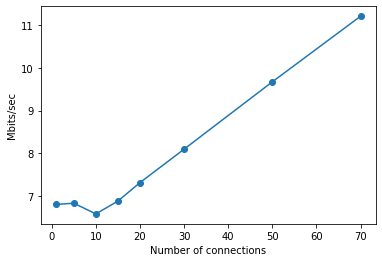

In [0]:
speeds = [6.81, 6.84, 6.59, 6.89, 7.32, 8.10, 9.67, 11.2]
numConns = [1, 5, 10, 15, 20, 30, 50, 70]
plt.plot(numConns, speeds, 'o', ls='-')
plt.xlabel('Number of connections')
plt.ylabel('Mbits/sec')
plt.show()

## Questions
### 1.
> Describe the parameters you use, e.g., length of time to transmit (with -t), number of parallel connections (with -P), and other parameters if you specify any. Note, only the number of parallel connections should vary, and all other parameters should be fixed.

I set the length of time to transmit to 10 seconds and ran the command with the numbers of connections=1, 5, 10, 15, 20, 30, 50, 70. (I tried `-P 100` but got Connection refused.)
### 2.
> What's the number of parallel connections that give the highest aggregate bandwidth? What's the trend of aggregate bandwidth as the number of parallel connections increases?

Number of parallel connections=70 gave the best result. The higher the number of connections, the higher bandwith I got.
### 3.
> Briefly explain the possible reasons behind what you observe. For instance, if aggregate bandwidth increases with more parallel connections at the beginning, then what's the mathematical formula that may explain this? And if aggregate bandwidth stops increasing or even decreases a bit later on, what might be the possible causes?

It makes sense that aggregate bandwith increases with more parallel connections resulted in higher bandwidth. As we can see in the plot above, the number of connections is in proportion to the bandwith. So an mathematical expression that describe the relationship would be $B=cN$, with $B$ being the bandwith and $N$ being the number of connections.
If the bandwith stops increasing at a point, it may be because the speed is bottlenecked by other factors such as hardware limitations.

# TCP Throughput v.s. Round Trip Time (RTT) to Server

## Script
```shell
#!/bin/sh
TTL=255
TIME=10
COUNT=5
# France
echo "France"
ping bouygues.testdebit.info -t $TTL -c $COUNT > franceRTT.txt
iperf3 -c bouygues.testdebit.info -t $TIME -p 5204 > franceBand.txt

# Moscow
echo "Moscow"
ping speedtest.hostkey.ru -t $TTL -c $COUNT > MoscowRTT.txt
iperf3 -c speedtest.hostkey.ru -t $TIME -p 5201 > MoscowBand.txt

# US California
echo "california"
ping iperf.he.net -t $TTL -c $COUNT > us-caRTT.txt
iperf3 -c iperf.he.net -t $TIME -p 5201 > us-caBand.txt
```

## Plot

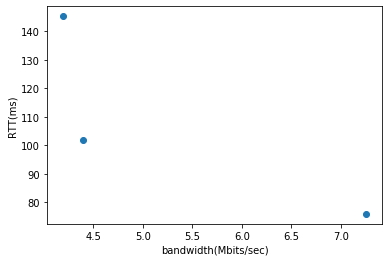

In [0]:
RTT = [101.698, 145.248, 75.884]
bandwidth = [4.40, 4.20, 7.25]
# plt.plot(bandwidth, RTT, 'o', ls='-')
plt.scatter(bandwidth, RTT)
plt.xlabel('bandwidth(Mbits/sec)')
plt.ylabel('RTT(ms)')
plt.show()

## Questions

>Describe the parameters you use, e.g., length of time to transmit (with -t), which servers you use (and where they are located), and other parameters if you specify any. Note, only the server names should vary, and all other parameters should be fixed.

For ping, I used `-t 255` and `-c 2`. For iperf3, I used `-t 10`.

>What mathematical relationship should you expect to see between throughput and RTT? Why?

They have a negative correlation, which makes sense, because a higher bandwith means means we can transfer data faster, so we should expect a lower RTT from that.

>If what you observe from your plot is not strictly the same as what's shown in the math equation (which is usually the case), then briefly explain what are other possible factors which may affect throughput.

Even though we expect a negative correlation between bandwidth and RTT, in many cases there will not be a perfect correlation. FOr example, a server far away with a high bandwith may still result in a long RTT.

# Wireshark

## 1. Curl/wget to grab a webpage:
### Questions
> What's the command that you run?

`wget -O /dev/null https://jamesku.xyz`



> Any DNS packets?

Yes.
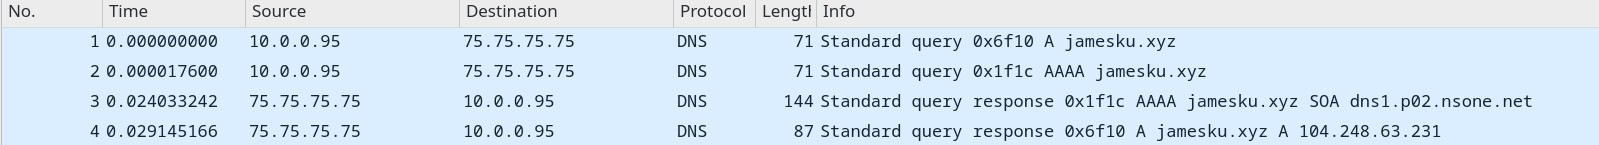

> Describe the TCP packets that you see, i.e., how each packet corresponds to TCP handshake, data transfer and closing connection steps.

TCP handshake:
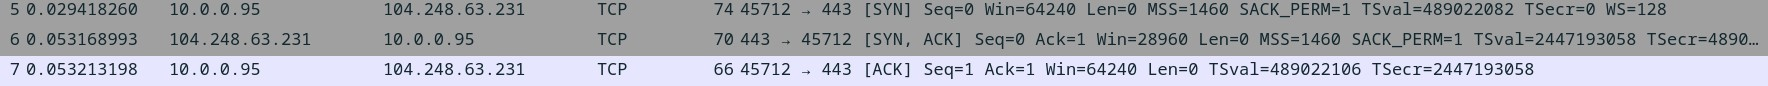

Application data and acks:
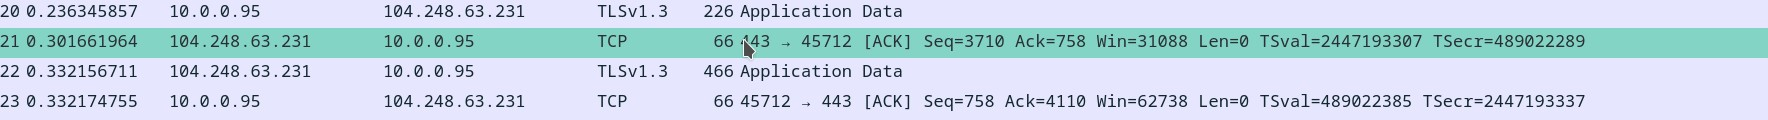
Closing connection:
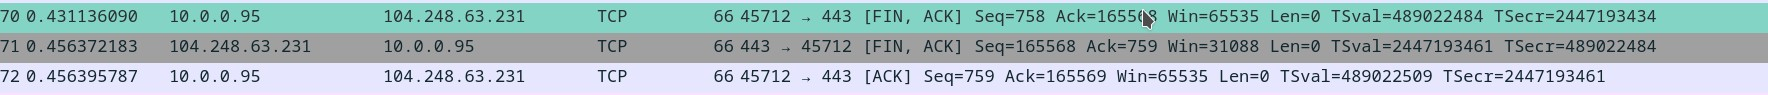

## 2. Open a webpage in a browser
### Questions
> Which website did you go to?

I visited my website: jamesku.xyz

> Do you see any parallel connections your browser makes? If so, how many can you see in your screenshot?

Yes. There are two connections. As we can see in the picture, there are two SYN packets.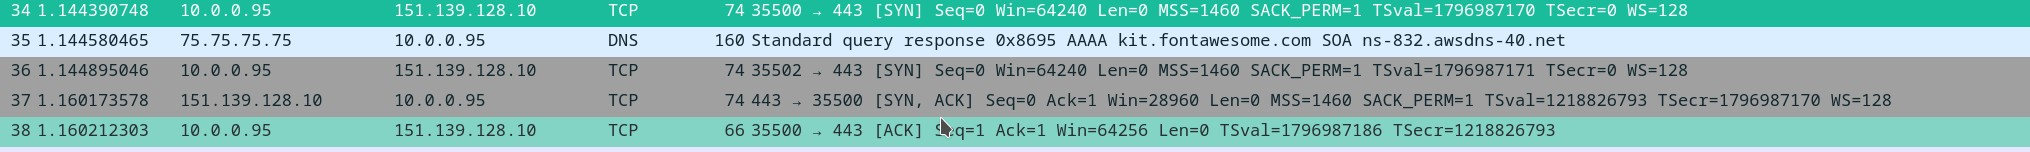